# Comparing Weather Station Data
---
The following short notebook is supposed to compare how many weather stations there are in Texas from our given data set to the [Master Location Identifier Database (MLID) - Standard Version](http://www.weathergraphics.com/identifiers/) provided by the reputable secondary source: [Weather Graphics](http://www.weathergraphics.com/about/).

In [1]:
import pandas as pd 

# Our TX Weather Stations DF produced previously on our Connections Jupyter Notebook
our_tx_weather_stations_df = pd.read_csv('~/Documents/ECE Next/ExtraData/our_tx_weather_stations.csv')
# Weather Graphic's DF that contains all weather stations that are located in the US 
us_weather_stations_df = pd.read_csv('~/Documents/ECE Next/ExtraData//master-location-identifier-database-202301_standard.csv', encoding='Windows-1252')

/tmp/ipykernel_457305/732477298.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  us_weather_stations_df = pd.read_csv('~/Documents/ECE Next/ExtraData//master-location-identifier-database-202301_standard.csv', encoding='Windows-1252')


In [2]:
print("US Weather Stations DF's Shape: {}".format(us_weather_stations_df.shape))
us_weather_stations_df.head()

US Weather Stations DF's Shape: (42207, 22)


,country3,country2,country,region,subregion,place_name,station_name,type,stn_key,status,...,wmo,wban,ghcn,special,lat,lon,elev,tz,Unnamed: 20,Unnamed: 21
0,ABW,AW,Aruba,-,-,Old Norwood,Old Norwood / John A. Osborne AP,NaN,AWaaNORW,-,...,78850.0,NaN,NaN,NaN,16.79111111,-62.193333,166.7,America/Montserrat,NaN,NaN
1,ABW,AW,Aruba,SA,-,Saba|Upper Hell's Gate,Saba / Juancho E. Yrausquin AP,NaN,AWaaHLGT,-,...,78871.0,NaN,NaN,NaN,17.64611111,-63.220833,42.1,America/Kralendijk,NaN,NaN
2,AFG,AF,Afghanistan,BAL,-,Kyzylabad|Mazar-I-Sharif|Qizil?b?d,Kyzylabad,NaN,AFaaOAMS,-,...,40911.0,NaN,NaN,NaN,36.7,67.200000,392.3,Asia/Kabul,NaN,NaN
3,AFG,AF,Afghanistan,BAL,-,Pushti-Bag|Mazari Sharif|Dehd?d?,Camp Spann,NaN,AFaaKQSP,-,...,NaN,NaN,NaN,NaN,36.6504,66.996000,408.0,Asia/Kabul,NaN,NaN
4,AFG,AF,Afghanistan,BAL,-,Qala-i-Gul Mohd|Mazari Sharif|Qizil?b?d,Camp Marmal,NaN,AFaaKQML,-,...,NaN,NaN,NaN,NaN,36.703,67.228000,391.0,Asia/Kabul,NaN,NaN


In [3]:
us_weather_stations_df.dtypes

country3         object
country2         object
country          object
region           object
subregion        object
place_name       object
station_name     object
type             object
stn_key          object
status           object
icao             object
national_id      object
wmo             float64
wban            float64
ghcn             object
special          object
lat              object
lon             float64
elev            float64
tz               object
Unnamed: 20     float64
Unnamed: 21      object
dtype: object

In [5]:
# Now lets extract all the weather stations from us_weather_stations_df that are located in texas
new_tx_weather_stations_df = us_weather_stations_df[(us_weather_stations_df['region'] == "TX") & (us_weather_stations_df['country3'] == "USA") & (us_weather_stations_df['stn_key'] != 'USaaKHES')].copy()
print("New Texas Weather Stations DF's shape: {}".format(new_tx_weather_stations_df.shape))
new_tx_weather_stations_df.head()

New Texas Weather Stations DF's shape: (687, 22)


,country3,country2,country,region,subregion,place_name,station_name,type,stn_key,status,...,wmo,wban,ghcn,special,lat,lon,elev,tz,Unnamed: 20,Unnamed: 21
38878,USA,US,United States,TX,NaN,Abernathy,Abernathy 5ENE WTM STN,NaN,USwtABER,-,...,NaN,NaN,NaN,WTM/ABER,33.87538,-101.757180,1015.0,NaN,NaN,NaN
38879,USA,US,United States,TX,Lubbock County,Abernathy,Abernathy AP,NaN,USfxxF83,-,...,NaN,NaN,NaN,NaN,33.845914,-101.762948,1014.1,America/Chicago,NaN,NaN
38880,USA,US,United States,TX,Taylor County,Abilene,Abilene WBO (City),NaN,USwABLNE,-,...,NaN,93922.0,USW00093922,NaN,32.45,-99.730000,528.0,America/Chicago,NaN,NaN
38881,USA,US,United States,TX,Taylor County,Abilene|Elmdale,Abilene Rgnl AP | Abilene Air Terminal,NaN,USaaKABI,-,...,72266.0,13962.0,USW00013962,NaN,32.411333,-99.681889,545.8,America/Chicago,NaN,NaN
38882,USA,US,United States,TX,Taylor County,Abilene|Tye,Dyess AFB,NaN,USaaKDYS,-,...,69019.0,13910.0,USW00013910,NaN,32.420617,-99.854600,545.7,America/Chicago,NaN,NaN


In [6]:
"""
In this line of code, we see that there are a total of 87 weather stations that are not identified by the ICAO.

Weather Graphics states that, "some examples of nonpublished ICAO indicators are the codes for minor airports 
in the United States (e.g. KCDS, Childress TX)."
"""
new_tx_weather_stations_df['icao'].notnull().value_counts()

icao
True     600
False     87
Name: count, dtype: int64

In [7]:
print('From OUR TX weather station data, we are missing a total of {} other weather stations that exist in TX.'.format(new_tx_weather_stations_df.shape[0] - our_tx_weather_stations_df.shape[0]))

From OUR TX weather station data, we are missing a total of 520 other weather stations that exist in TX.


## Map/Graph Differences 
---


/tmp/ipykernel_457305/2058791092.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/tmp/ipykernel_457305/2058791092.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  bx.legend()
/tmp/ipykernel_457305/2058791092.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  cx.legend()


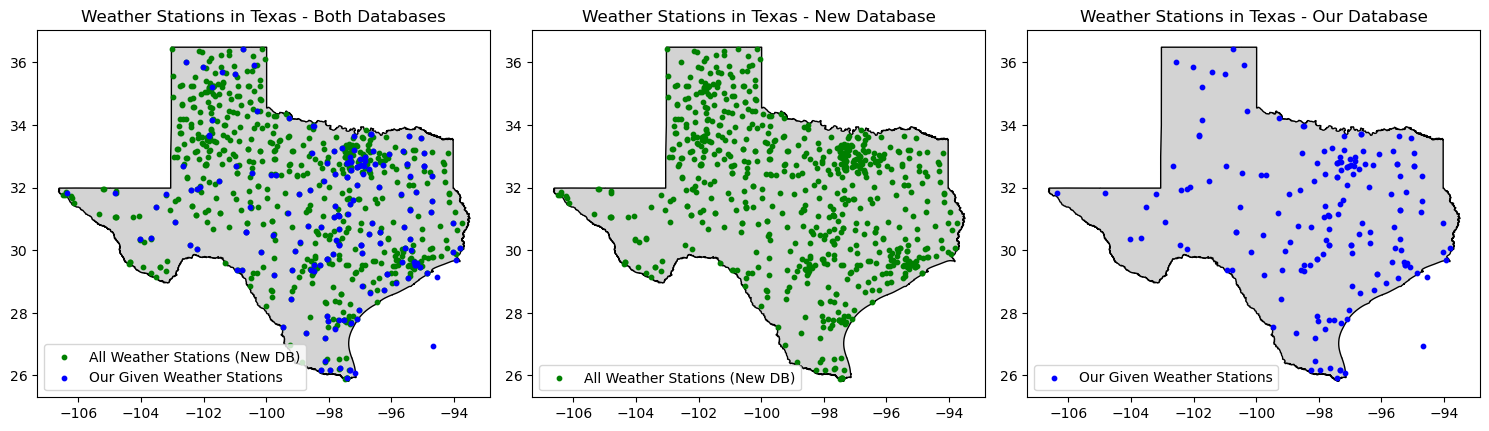

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Texas shapefile
texas_shp_file = gpd.read_file("~/Documents/ECE Next/TexasSHP/State.shp")

# Convert weather stations and buses DataFrames into geopandas GeoDataFrames
our_tx_weather_stations_gdf = gpd.GeoDataFrame(our_tx_weather_stations_df, geometry=gpd.points_from_xy(our_tx_weather_stations_df['Longitude'], our_tx_weather_stations_df['Latitude']))
new_tx_weather_stations_gdf = gpd.GeoDataFrame(new_tx_weather_stations_df, geometry=gpd.points_from_xy(new_tx_weather_stations_df['lon'], new_tx_weather_stations_df['lat']))

fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(15, 5))

texas_shp_file.plot(ax=ax, color='lightgray', edgecolor='black', label='Texas Shapefile')
texas_shp_file.plot(ax=bx, color='lightgray', edgecolor='black', label='Texas Shapefile')
texas_shp_file.plot(ax=cx, color='lightgray', edgecolor='black', label='Texas Shapefile')

new_tx_weather_stations_gdf.plot(ax=bx, color='green', markersize=10, label='All Weather Stations (New DB)')
our_tx_weather_stations_gdf.plot(ax=cx, color='blue', markersize=10, label='Our Given Weather Stations')

# Plotting both databases together on 'ax' subplot
new_tx_weather_stations_gdf.plot(ax=ax, color='green', markersize=10, label='All Weather Stations (New DB)')
our_tx_weather_stations_gdf.plot(ax=ax, color='blue', markersize=10, label='Our Given Weather Stations')

ax.set_title("Weather Stations in Texas - Both Databases")
bx.set_title("Weather Stations in Texas - New Database")
cx.set_title("Weather Stations in Texas - Our Database")

ax.legend()
bx.legend()
cx.legend()

plt.tight_layout()
plt.show()

### Final Mini Analysis
---
It is important to understand that there exists more weather stations out there in Texas that are not in our given Texas weather data. To be exact, we are missing a total of **520** other weather stations that exists in TX that are not in the data set that we are working with for this research project. 